In [274]:
%%javascript
$([IPython.events]).on('notebook_loaded.Notebook', function () {
    $('h1').first().before('<h1 id="TOC">Table of Contents</h1><ol id="toclist"></ol>');
    $('h1').each(function( index ) { if (index > 0) {$('#toclist').append('<li><a href="#'+$(this).attr('id')+'">'+$(this).html()+'</li>'); $(this).html(index + ". " + $(this).html()); }});
    $('#toclist').click();
    $('#toclist').clone().attr('id','toclist2').prependTo('#site').css('position','fixed').css('padding-left','1.5em').css('z-index',1)
    $('#notebook-container').css('margin-right','1em')
})

<IPython.core.display.Javascript object>

# Overview
Creates a master database containing data from various sources. This notebook uses scrips from [Erdem](https://github.com/madHatter106/beaching/blob/develop/notebooks/) and [Ron](https://drive.google.com/drive/folders/11XOr5UOr1lg50nB8lryj78l0AspZrPkT)

The output is saved as `./Create_Merged_Database.pkl`

To execute, download the [data directory]() directory and modify <code>rootDir</code> below.

In [275]:
%reset -f
rootDir = '/Users/robertweigel/Desktop/Weigel_Stranding/data'
tmpDir =  '/Users/robertweigel/Desktop/Weigel_Stranding/datatmp'

In [276]:
import pandas as pd
import numpy as np
import os as os
import glob

In [277]:
if not os.path.exists(tmpDir): os.makedirs(tmpDir)

# Stranding

In [278]:
pklFile = os.path.join(tmpDir,'dfStranding.pkl')
# Create temp pkl file if not found. Otherwise read pkl file.
if not os.path.isfile(pklFile):
    strandingFile = os.path.join(rootDir,'IFAW Mass Stranding Data 1999-2014 V2.xlsx')
    dfStranding = pd.read_excel(strandingFile, sheet_name='RAW')
    dfStranding.drop(['COMMENTS', 'LAT_ACTUAL', 'LON_ACTUAL', 'LAT_ACHIEVED', 'EXAM_DATE','EXAM_COND_ID', 'LOCATION', 'NUM_ANIMALS_UNITS','CCSN_NUM','LOCATION_DETAIL','SERIES_NUM'], axis=1, inplace=True)
    dfStranding.index = pd.DatetimeIndex(dfStranding.REPORT_DATE)
    dfStranding.to_pickle(pklFile)
else:
    dfStranding = pd.read_pickle(pklFile)
dfStranding.head(10)    

,REPORT_DATE,MASS_STRAND_NUM,CONDITION_CODE,RESTRAND_YN,GROUP_EVENT_YN,COW_CALF_YN,MASS_STRANDING_YN,NUM_ANIMALS,TOWN,LATITUDE_DEGREE,LONGITUDE_DEGREE,SPECIES,Unnamed: 23,Corrected Latitude,Corrected Longitude,Corrected Total Num. of Animals,Lagenorhynchus acutus,Delphinus delphis,Globicephala melas,Grampus griseus,Stenella coeruleoalba,Tursiops truncatus,Unnamed: 33,Latitude,Longitude,Name,HideNameUntilMouseOver,AppendLatLonToDescription,Icon,IconScale,Folder,TimeWhen,Num Anim. Involved,Description
REPORT_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,6.0,6.0,0.0,0.0,0.0,0.0,0.0,NaN,41.916667,-70.033333,2.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,3.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,4.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,5.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,2.0,0.0,-1.0,0.0,-1.0,6.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,6.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,2.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,7.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-18,1999-03-18,MS99-02,2.0,0.0,0.0,0.0,0.0,1.0,Barnstable,41.718017,70.368650,Lagenorhynchus acutus,NaN,41.718017,-70.3687,5.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,41.718017,-70.368650,8.0,1.0,1.0,180.0,0.9,MS99-02,1999-03-18,5.0,MS ID: MS99-02<br/>Species: Lagenorhynchus acu...
1999-03-18,1999-03-18,MS99-02,2.0,0.0,0.0,0.0,0.0,1.0,Barnstable,41.718017,70.368650,Lagenorhynchus acutus,NaN,41.718017,-70.3687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.718017,-70.368650,9.0,1.0,1.0,180.0,0.9,MS99-02,1999-03-18,5.0,MS ID: MS99-02<br/>Species: Lagenorhynchus acu...
1999-03-18,1999-03-18,MS99-02,2.0,0.0,0.0,0.0,0.0,1.0,Barnstable,41.718600,-70.368200,Lagenorhynchus acutus,NaN,41.718600,-70.3682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.718600,-70.368200,10.0,1.0,1.0,180.0,0.9,MS99-02,1999-03-18,5.0,MS ID: MS99-02<br/>Species: Lagenorhynchus acu...


In [279]:
dfStranding.describe()

,CONDITION_CODE,RESTRAND_YN,GROUP_EVENT_YN,COW_CALF_YN,MASS_STRANDING_YN,NUM_ANIMALS,LATITUDE_DEGREE,LONGITUDE_DEGREE,Unnamed: 23,Corrected Latitude,Corrected Total Num. of Animals,Lagenorhynchus acutus,Delphinus delphis,Globicephala melas,Grampus griseus,Stenella coeruleoalba,Tursiops truncatus,Unnamed: 33,Latitude,Longitude,Name,HideNameUntilMouseOver,AppendLatLonToDescription,Icon,IconScale,Num Anim. Involved
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,9.240000e+02,9.240000e+02,0.0,924.000000,170.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,0.0,924.000000,924.000000,924.000000,924.0,924.0,924.000000,9.240000e+02,924.000000
mean,1.615801,-0.027056,-0.324675,-0.004329,-0.317100,4.033550,4.675455e+04,8.494155e+04,NaN,41.865475,11.275730,3.759136,6.350995,1.257388,0.179780,0.036082,0.036082,NaN,41.865475,-70.088220,463.500000,1.0,1.0,164.226190,9.000000e-01,12.586580
std,0.842152,0.162335,0.468507,0.065688,0.465599,5.583985,4.343552e+05,7.607610e+05,NaN,0.102754,70.794292,23.463531,40.369566,8.442815,1.219736,0.263481,0.263481,NaN,0.102754,0.134001,266.880123,0.0,0.0,11.507298,1.455180e-14,13.447143
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,4.142633e+01,-7.047960e+01,NaN,41.426333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,41.426333,-71.256667,2.000000,1.0,1.0,155.000000,9.000000e-01,1.000000
25%,1.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,4.177930e+01,-7.001200e+01,NaN,41.778692,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,41.778692,-70.070875,232.750000,1.0,1.0,155.000000,9.000000e-01,4.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.190530e+01,7.002327e+01,NaN,41.901800,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,41.901800,-70.054333,463.500000,1.0,1.0,155.000000,9.000000e-01,8.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.192805e+01,7.006817e+01,NaN,41.927808,6.000000,2.000000,4.124336,0.000000,0.000000,0.000000,0.000000,NaN,41.927808,-70.016450,694.250000,1.0,1.0,180.000000,9.000000e-01,16.000000
max,6.000000,0.000000,0.000000,0.000000,0.000000,22.000000,4.193193e+06,7.009782e+06,NaN,42.485750,924.000000,304.000000,528.000000,77.000000,11.000000,2.000000,2.000000,NaN,42.485750,-69.935000,925.000000,1.0,1.0,190.000000,9.000000e-01,56.000000


In [280]:
dfStranding.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932 entries, 1999-03-07 to NaT
Data columns (total 34 columns):
REPORT_DATE                        924 non-null datetime64[ns]
MASS_STRAND_NUM                    924 non-null object
CONDITION_CODE                     924 non-null float64
RESTRAND_YN                        924 non-null float64
GROUP_EVENT_YN                     924 non-null float64
COW_CALF_YN                        924 non-null float64
MASS_STRANDING_YN                  924 non-null float64
NUM_ANIMALS                        924 non-null float64
TOWN                               924 non-null object
LATITUDE_DEGREE                    924 non-null float64
LONGITUDE_DEGREE                   924 non-null float64
SPECIES                            924 non-null object
Unnamed: 23                        0 non-null float64
Corrected Latitude                 924 non-null float64
Corrected Longitude                930 non-null object
Corrected Total Num. of Animals    170 non

In [281]:
dfStranding.REPORT_DATE.dt.year.value_counts().sort_index()

1999.0     61
2000.0     19
2001.0      8
2002.0     95
2003.0     41
2004.0      7
2005.0     84
2006.0    107
2007.0     45
2008.0     28
2009.0     37
2010.0     69
2011.0     51
2012.0    240
2013.0     16
2014.0     16
Name: REPORT_DATE, dtype: int64

In [282]:
dfStranding.head(7)

,REPORT_DATE,MASS_STRAND_NUM,CONDITION_CODE,RESTRAND_YN,GROUP_EVENT_YN,COW_CALF_YN,MASS_STRANDING_YN,NUM_ANIMALS,TOWN,LATITUDE_DEGREE,LONGITUDE_DEGREE,SPECIES,Unnamed: 23,Corrected Latitude,Corrected Longitude,Corrected Total Num. of Animals,Lagenorhynchus acutus,Delphinus delphis,Globicephala melas,Grampus griseus,Stenella coeruleoalba,Tursiops truncatus,Unnamed: 33,Latitude,Longitude,Name,HideNameUntilMouseOver,AppendLatLonToDescription,Icon,IconScale,Folder,TimeWhen,Num Anim. Involved,Description
REPORT_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,6.0,6.0,0.0,0.0,0.0,0.0,0.0,NaN,41.916667,-70.033333,2.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,3.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,4.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,1.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,5.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,2.0,0.0,-1.0,0.0,-1.0,6.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,6.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-07,1999-03-07,MS99-01,2.0,0.0,0.0,0.0,0.0,1.0,Wellfleet,41.916667,70.033333,Lagenorhynchus acutus,NaN,41.916667,-70.0333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.916667,-70.033333,7.0,1.0,1.0,180.0,0.9,MS99-01,1999-03-07,6.0,MS ID: MS99-01<br/>Species: Lagenorhynchus acu...
1999-03-18,1999-03-18,MS99-02,2.0,0.0,0.0,0.0,0.0,1.0,Barnstable,41.718017,70.368650,Lagenorhynchus acutus,NaN,41.718017,-70.3687,5.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,41.718017,-70.368650,8.0,1.0,1.0,180.0,0.9,MS99-02,1999-03-18,5.0,MS ID: MS99-02<br/>Species: Lagenorhynchus acu...


In [283]:
pklFile = os.path.join(tmpDir,'dfStrandingCompact.pkl')
if not os.path.isfile(pklFile):
    # Keep only three columns.
    dfStrandingCompact = dfStranding[['SPECIES','CONDITION_CODE','NUM_ANIMALS']].sort_index()
    # Create new columns SPECIES_X where X is is species found in SPECIES column and has value of 0 or 1.
    # Similar for CONDITION_CODE
    dfStrandingCompact = dfStrandingCompact[dfStrandingCompact['CONDITION_CODE'] == 1]
    dfStrandingCompact = pd.get_dummies(dfStrandingCompact, columns=['SPECIES'])    
    # Resample/average to 1-day time grid and replace NaN with 0.0.
    dfStrandingCompact = dfStrandingCompact.resample('D').sum().replace(np.NaN, 0.0)
    dfStrandingCompact.to_pickle(pklFile)
else:
    dfStrandingCompact = pd.read_pickle(pklFile)
dfStrandingCompact.head(10)    

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus
REPORT_DATE,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0
1999-03-08,0.0,0.0,0,0,0,0,0,0
1999-03-09,0.0,0.0,0,0,0,0,0,0
1999-03-10,0.0,0.0,0,0,0,0,0,0
1999-03-11,0.0,0.0,0,0,0,0,0,0
1999-03-12,0.0,0.0,0,0,0,0,0,0
1999-03-13,0.0,0.0,0,0,0,0,0,0
1999-03-14,0.0,0.0,0,0,0,0,0,0
1999-03-15,0.0,0.0,0,0,0,0,0,0


# Ground Magnetometer

In [284]:
def ParseTxtFile(fp, station='FRD'):
    dfTemp = pd.DataFrame(columns=['%sH' % station, '%sV' % station])
    try:
        df = pd.read_csv(fp, skiprows=12, delim_whitespace=True,
                         parse_dates=[[0, 1]], index_col=0 )
    except Exception:
        try:
            df = pd.read_csv(fp, skiprows=24, delim_whitespace=True,
                             parse_dates=[[0, 1]], index_col=0)
        except Exception:
            try:
                df = pd.read_csv(fp, skiprows=25, delim_whitespace=True,
                                 parse_dates=[[0, 1]], index_col=0)
            except Exception:
                print("file %s failed" % fp, flush=True)
                return None
    finally:
        df = df.replace(99999.0, np.nan).resample('D').mean()
        if '%sX' % station in df.columns:
            dfTemp['%sH' % station] = np.sqrt(np.power(df['%sX' % station],2) +
                                              np.power(df['%sY' % station], 2))
        else:
            dfTemp['%sH' % station] = df['%sH' % station]
        dfTemp['%sV' % station] = df['%sZ' % station]
        return dfTemp


def MakeDF(years, dirpath, pklFile, returnDF=False):
    station = dirpath.split('/')[-1]
    startYr, endYr = years
    df = None
    for year in range(startYr, endYr):
        print("parsing %d" % (year))
        fileGen = glob.iglob(os.path.join(dirpath, '%d/*' % year))
        dataList = [ParseTxtFile(file, station=station.upper()) for file in fileGen]
        dfTemp = pd.concat(dataList)
        if df is None:
            df = dfTemp
        else:
            df = pd.concat((df, dfTemp))
    df.to_pickle(pklFile)
    if returnDF:
        return df
    else:
        del df
        return None

In [285]:
dir = os.path.join(rootDir,'magnetometer','frd')
pklFile = os.path.join(tmpDir, 'dfMag_%s.pkl' % 'frd')
# Create pkl file if not found. Otherwise read pkl file.
if not os.path.isfile(pklFile):
    MakeDF((1999, 2015), dir, pklFile)
dfFRD = pd.read_pickle(pklFile) 
dfFRD.head()

,FRDH,FRDV
DATE_TIME,,
1999-03-22,20895.358345,49095.401321
1999-11-15,20888.301878,49009.513206
1999-11-05,20908.789499,49004.525313
1999-06-01,20918.816134,49061.184097
1999-06-11,20907.461474,49064.152573


In [286]:
dir = os.path.join(rootDir,'magnetometer','ott')
pklFile = os.path.join(tmpDir, 'dfMag_%s.pkl' % 'ott')
# Create pkl file if not found. Otherwise read pkl file.
if not os.path.isfile(pklFile):
    MakeDF((1999, 2015), dir, pklFile)
dfOTT = pd.read_pickle(pklFile) 
dfOTT.head()

,OTTH,OTTV
DATE_TIME,,
1999-10-19,17483.773538,53443.307500
1999-05-13,17468.007449,53487.593194
1999-10-09,17492.775622,53443.067639
1999-05-03,17471.462618,53504.902153
1999-12-07,17488.764841,53424.849722


In [287]:
# Combine magnetometer data
dfMag = pd.merge(dfFRD,dfOTT, how='outer', left_index=True, right_index=True)
dfMag.head()
dfMag = dfMag-dfMag.mean()
pklFile = os.path.join(tmpDir, 'dfMag.pkl')
if not os.path.isfile(pklFile):
    dfMag.to_pickle(pklFile)
else:
    dfMag = pd.read_pickle(pklFile)

In [288]:
display(dfMag.head())
display(dfMag.describe())

,FRDH,FRDV,OTTH,OTTV
DATE_TIME,,,,
1999-01-01,-233.575113,1227.429005,-391.092549,1095.743596
1999-01-02,-237.959814,1228.579075,-394.279583,1095.132485
1999-01-03,-238.070232,1231.639031,-391.861470,1098.543458
1999-01-04,-242.246751,1231.449151,-396.547174,1095.873874
1999-01-05,-248.366073,1231.807030,-402.969560,1100.858805


,FRDH,FRDV,OTTH,OTTV
count,5.827000e+03,5.824000e+03,5.830000e+03,5.830000e+03
mean,4.997772e-11,1.604846e-10,-1.056100e-10,-7.948266e-11
std,1.508868e+02,7.072963e+02,2.296048e+02,6.289711e+02
min,-3.278838e+02,-1.205582e+03,-4.838198e+02,-1.070107e+03
25%,-1.363300e+02,-6.123419e+02,-2.046878e+02,-5.431985e+02
50%,-9.252650e+00,-5.491084e+00,-9.395682e-01,-4.654702e+00
75%,1.374865e+02,6.112034e+02,2.028354e+02,5.423122e+02
max,2.635859e+02,1.233238e+03,3.843094e+02,1.115815e+03


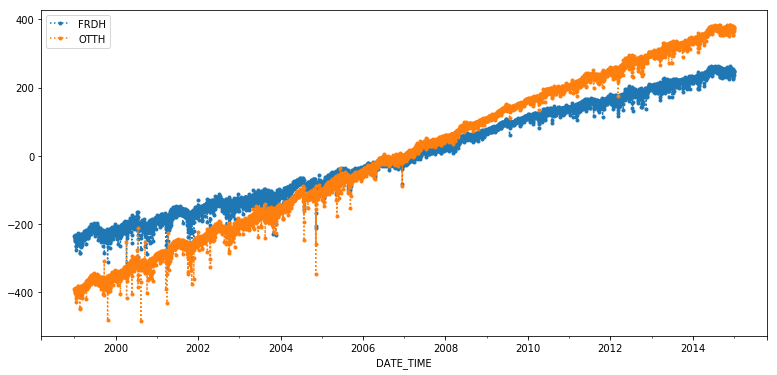

In [289]:
dfMag.plot(y=['FRDH', 'OTTH'], figsize=(13,6), marker='.', ls=':')

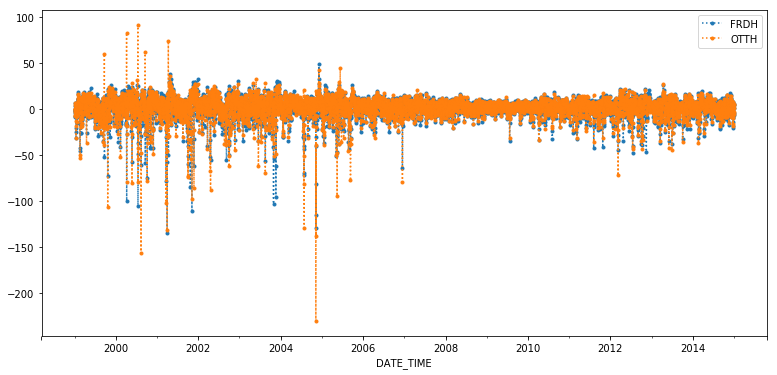

In [290]:
dfMag = dfMag-dfMag.rolling('31D').mean() # Remove trend
dfMag.plot(y=['FRDH', 'OTTH'], figsize=(13,6), marker='.', ls=':')

In [291]:
# Create column that is difference between values measured at two sites
dfMag['dH'] = dfMag['FRDH']-dfMag['OTTH']
dfMag['dV'] = dfMag['FRDV']-dfMag['OTTV']

# Space Weather

In [292]:
pklFileHourly = os.path.join(tmpDir,'dfSpaceWeatherDataHourly.pkl')
pklFileDaily = os.path.join(tmpDir,'dfSpaceWeatherDataDaily.pkl')
if not os.path.isfile(pklFileDaily):
    fp = os.path.join(rootDir,'SpaceWeatherDataHourly.txt')
    skip_lines=8
    dfSW = pd.read_csv(fp, skiprows=skip_lines, delim_whitespace=True,index_col='datetime',
                       parse_dates={'datetime': [0, 1, 2]},
                       date_parser=lambda x: pd.datetime.strptime(x, '%Y %j %H'))
    dfSW.columns = ['Kp_index', 'Sunspot_No', 'Dst_index','AE_index','Proton_flux_gt30MeV','Proton_flux_gt60MeV']
    dfSW.replace(99999.99, np.NaN, inplace=True)
    dfSW.to_pickle(pklFileHourly)
    dfSW = dfSW.resample('D').mean()
    dfSW.to_pickle(pklFileDaily)
else:
    dfSW = pd.read_pickle(pklFileDaily)
    dfSW.head()

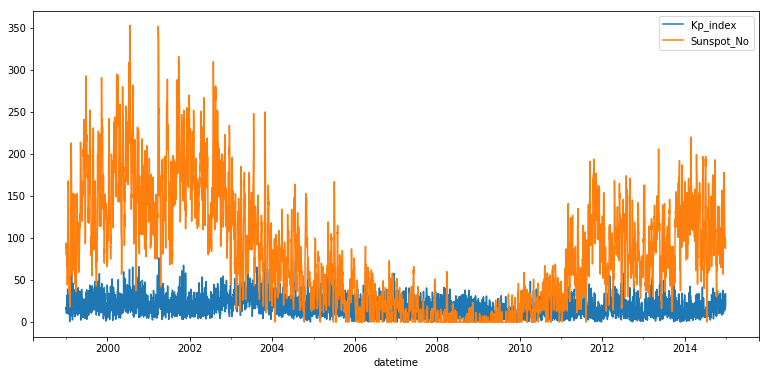

In [293]:
dfSW.plot(y=['Kp_index', 'Sunspot_No'], figsize=(13,6))

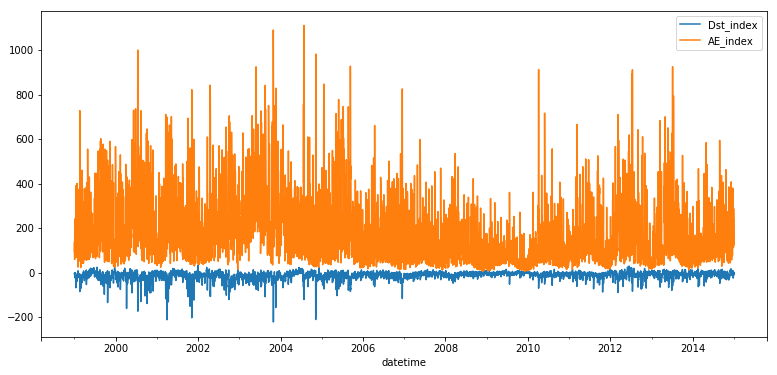

In [294]:
dfSW.plot(y=['Dst_index', 'AE_index'], figsize=(13,6))

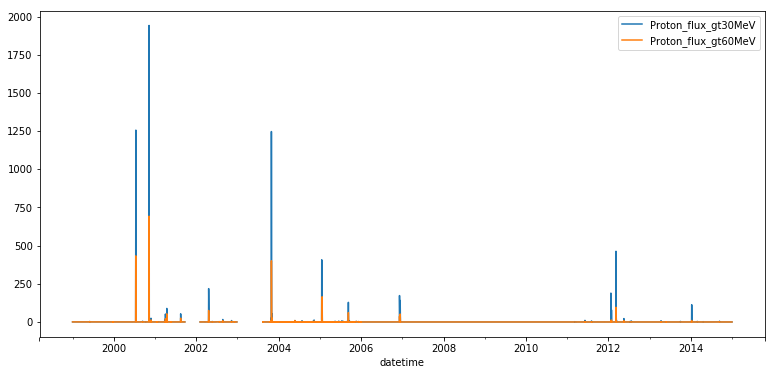

In [295]:
dfSW.plot(y=['Proton_flux_gt30MeV','Proton_flux_gt60MeV'], figsize=(13,6))

# Tidal Data

Tide data was collected for Provincetown MA (Cape Cod) from NOAA harmonic tide model.  Source:

https://tidesandcurrents.noaa.gov/noaatidepredictions.html?id=8446121

Date-Time - time when high or low tide occurred.

Pred      - Height of tide above MLLW (Mean Lower Low Water), i.e., low tide.  Negative values mean tide is below MLLW. (meters)

High/Low  - Indicator for whether time stamp is for high tide ('H') or low tide ('L'). (unitless)

In [296]:
pklFile = os.path.join(tmpDir,'dfTide.pkl')
if not os.path.isfile(pklFile):    
    # Get list of tide files, read them and produce a dataframe of tide data
    files = os.path.join(rootDir,'tide','*.txt')
    filelist = glob.glob(files)
    dfTide = pd.concat( [ pd.read_csv(file, delim_whitespace=True, header=12, usecols=[0,2,3,4],
                    parse_dates=[[0,1]], index_col=0) for file in filelist ] )
    dfTide.index.name = 'Date-Time'
    dfTide.sort_index(inplace=True)
    dfTide.to_pickle(pklFile)    
else:
    dfTide = pd.read_pickle(pklFile)

dfTide.head()

,Pred,High/Low
Date-Time,,
1999-01-01 03:45:00,-0.14,L
1999-01-01 10:02:00,3.44,H
1999-01-01 16:27:00,-0.46,L
1999-01-01 22:42:00,3.01,H
1999-01-02 04:39:00,-0.14,L


In [297]:
pklFile = os.path.join(tmpDir,'dfTideDaily.pkl')
dfTideDaily = pd.DataFrame()
if True: #not os.path.isfile(pklFile): 
    dfTideDaily['High Tide Ave'] = dfTide['Pred'][dfTide['High/Low'] == 'H'].resample('D').mean()
    dfTideDaily['Low Tide Ave'] = dfTide['Pred'][dfTide['High/Low'] == 'L'].resample('D').mean()
    dfTideDaily['High Tide Max'] = dfTide['Pred'][dfTide['High/Low'] == 'H'].resample('D').max()
    dfTideDaily['High Tide Min'] = dfTide['Pred'][dfTide['High/Low'] == 'H'].resample('D').min()
    dfTideDaily['Low Tide Max'] = dfTide['Pred'][dfTide['High/Low'] == 'L'].resample('D').max()
    dfTideDaily['Low Tide Min'] = dfTide['Pred'][dfTide['High/Low'] == 'L'].resample('D').min()
    dfTideDaily.to_pickle(pklFile)
else:
    dfTideDaily = pd.read_pickle(pklFile)
dfTideDaily.head()

,High Tide Ave,Low Tide Ave,High Tide Max,High Tide Min,Low Tide Max,Low Tide Min
Date-Time,,,,,,
1999-01-01,3.225,-0.300,3.44,3.01,-0.14,-0.46
1999-01-02,3.225,-0.305,3.44,3.01,-0.14,-0.47
1999-01-03,3.410,-0.285,3.41,3.41,-0.13,-0.44
1999-01-04,3.165,-0.225,3.33,3.00,-0.09,-0.36
1999-01-05,3.095,-0.135,3.22,2.97,-0.02,-0.25


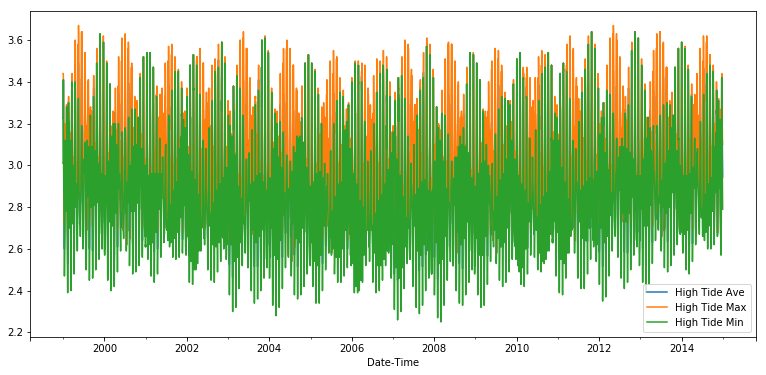

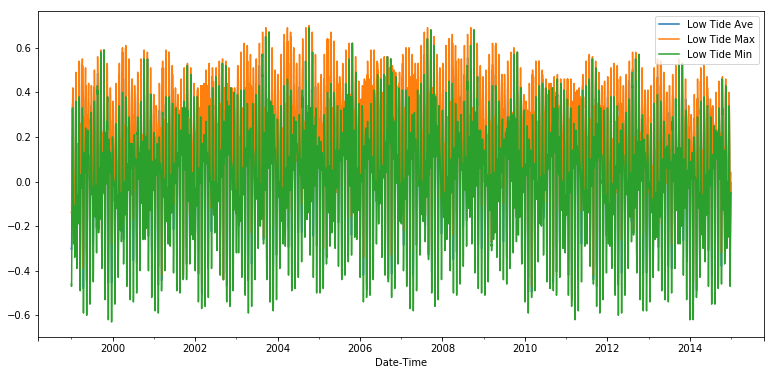

In [298]:
dfTideDaily.filter(regex='High').plot(figsize=(13,6))
dfTideDaily.filter(regex='Low').plot(figsize=(13,6))

# Wind Data

Wind Data Description

* **WDIR**	Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD. See Wind Averaging Methods
* **WSPD**	Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly. See Wind Averaging Methods.
* **GST**	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period. The 5 or 8 second period can be determined by payload, See the Sensor Reporting, Sampling, and Accuracy section.
* **WVHT**	Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period. See the Wave Measurements section.
* **DPD**	Dominant wave period (seconds) is the period with the maximum wave energy. See the Wave Measurements section.
* **APD**	Average wave period (seconds) of all waves during the 20-minute period. See the Wave Measurements section.
* **MWD**	The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees. See the Wave Measurements section.
* **PRES**	Sea level pressure (hPa). For C-MAN sites and Great Lakes buoys, the recorded pressure is reduced to sea level using the method described in NWS Technical Procedures Bulletin 291 (11/14/80). ( labeled BAR in Historical files)
* **ATMP**	Air temperature (Celsius). For sensor heights on buoys, see Hull Descriptions. For sensor heights at C-MAN stations, see C-MAN Sensor Locations
* **WTMP**	Sea surface temperature (Celsius). For buoys the depth is referenced to the hull's waterline. For fixed platforms it varies with tide, but is referenced to, or near Mean Lower Low Water (MLLW).
* **DEWP**	Dewpoint temperature taken at the same height as the air temperature measurement.
* **VIS**	Station visibility (nautical miles). Note that buoy stations are limited to reports from 0 to 1.6 nmi.
* **PTDY**	Pressure Tendency is the direction (plus or minus) and the amount of pressure change (hPa)for a three hour period ending at the time of observation. (not in Historical files)
* **TIDE**	The water level in feet above or below Mean Lower Low Water (MLLW).

In [299]:
def Cleanup(dataframe):
    dataframe.set_index('date', inplace=True,)
    dataframe.drop(['MWD', 'DEWP', 'VIS'], axis=1, inplace=True)
    dataframe.loc[:,['WD', 'ATMP', 'WTMP']].replace('999.0', np.NaN, inplace=True)
    dataframe.loc[dataframe.WD==999, 'WD'] = np.NaN
    dataframe.loc[dataframe.WSPD==99, 'WSPD'] = np.NaN
    dataframe.loc[dataframe.GST==99, 'GST'] = np.NaN
    dataframe.loc[dataframe.WVHT==99, 'WVHT'] = np.NaN
    dataframe.loc[dataframe.DPD==99, 'DPD'] = np.NaN
    dataframe.loc[dataframe.APD==99, 'APD'] = np.NaN
    if 'BAR' in dataframe.columns:
        dataframe.loc[dataframe.BAR==9999, 'BAR'] = np.NaN
    dataframe.loc[dataframe.ATMP==999, 'ATMP'] = np.NaN
    dataframe.loc[dataframe.WTMP==999, 'WTMP'] = np.NaN
    try:
        dataframe.loc[dataframe.TIDE==99, 'TIDE'] = np.NaN
        #print('corrected TIDE')
    except:
        pass
    #return dataframe

def GetWindPersistence(dataframe):
    dataframe['SoutherlyPersistence'] = np.cos(np.deg2rad(dataframe.WD)) * dataframe.WSPD
    dataframe['EasterlyPersistence'] = np.sin(np.deg2rad(dataframe.WD)) * dataframe.WSPD
    dataframe.dropna(subset=['WD', 'WSPD'], inplace=True)
    #return dataframe

def AggregateDF(dataframe):
    dfMonthMean = dataframe.drop(['WD', 'WSPD'], axis=1).resample('M').mean()
    dfMonthStd = dataframe.drop(['WD', 'WSPD'], axis=1).resample('M').std()
    return dfMonthMean, dfMonthStd

def RunPrep(frame):
    frame = Cleanup(frame)
    frame = GetWindPersistence(frame)

In [300]:
pklDir = tmpDir
windDir = os.path.join(rootDir,'wind')
fprfx = '44013_'
years = [str(year) for year in range(1999, 2015)] # generator

In [301]:
df = None
dfUnits = None
for yr in years: 
    fp = '%s%s%s%s.txt' % (windDir, os.sep, fprfx, yr)
    print('Reading %s' % fp)
    dfyear = pd.read_csv(fp, delim_whitespace=True,
                         parse_dates={'date':[0,1,2,3]}, header='infer', infer_datetime_format=True)
    if int(yr) >= 2007:
        dfyear = dfyear.iloc[1:]
        dfyear['date'] = pd.to_datetime(dfyear.date, infer_datetime_format=True)
        dfyear.iloc[:,1:] = dfyear.iloc[:,1:].astype('f8')
        dfyear.rename(columns={'WDIR': 'WD'}, inplace=True)

    #display(dfyear.head(2))
    #display(dfyear.tail(2))        
    Cleanup(dfyear)
    GetWindPersistence(dfyear)
    df = pd.concat([df, dfyear], sort=True)
    del dfyear
df.drop(['mm', 'TIDE', 'PRES'], axis=1, inplace=True)
df.to_pickle(os.path.join(tmpDir,'dfWind.pkl'))

Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_1999.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2000.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2001.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2002.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2003.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2004.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2005.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2006.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2007.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2008.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2009.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/44013_2010.txt
Reading /Users/robertweigel/Desktop/Weigel_Stranding/data/wind/4

In [302]:
df.head()

,APD,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
date,,,,,,,,,,,
1999-01-01 00:00:00,5.25,-4.3,1017.4,11.11,-3.542719,7.2,-4.075432,221.0,5.4,5.6,0.33
1999-01-01 01:00:00,5.51,-4.0,1016.5,11.11,-3.447704,7.3,-4.412860,218.0,5.6,5.7,0.31
1999-01-01 02:00:00,6.53,-3.9,1015.8,12.50,-4.100237,7.0,-3.959553,226.0,5.7,5.7,0.32
1999-01-01 03:00:00,6.17,-3.9,1015.3,11.11,-4.235926,7.3,-3.814044,228.0,5.7,5.7,0.31
1999-01-01 04:00:00,5.02,-3.8,1015.0,11.11,-4.948156,7.7,-3.213370,237.0,5.9,5.6,0.39


In [303]:
dfWindDaily = df.resample('D').mean()
dfWindDaily.head()

,APD,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
date,,,,,,,,,,,
1999-01-01,4.260000,-3.908333,1015.262500,7.372083,-8.369086,11.741667,-1.962736,249.958333,9.137500,5.629167,0.782083
1999-01-02,3.723333,-10.725000,1030.775000,4.049167,-10.358338,13.787500,2.124278,281.208333,10.816667,5.470833,1.029167
1999-01-03,3.920000,0.058333,1019.787500,4.574583,5.530758,11.558333,-3.071964,152.208333,9.025000,5.187500,1.402083
1999-01-04,6.136667,2.312500,1005.654167,10.669583,-6.726604,10.241667,-2.535160,245.166667,8.141667,5.108333,1.735000
1999-01-05,4.175455,-3.539130,1018.808696,8.880909,-8.472319,11.386957,-0.380683,269.043478,8.826087,4.904348,0.875000


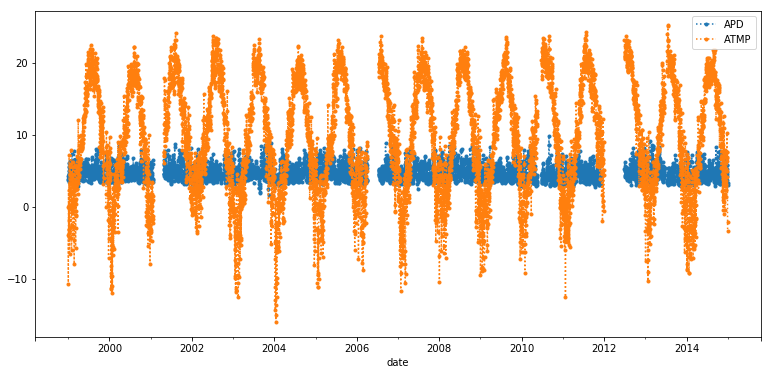

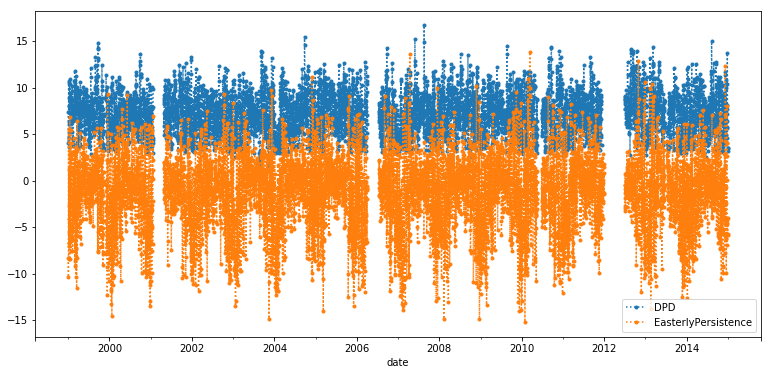

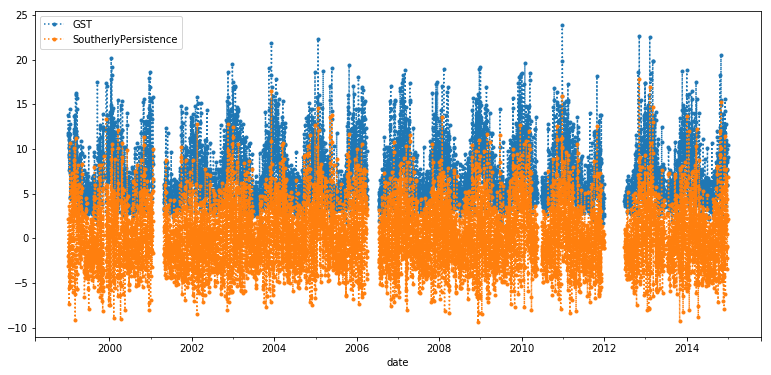

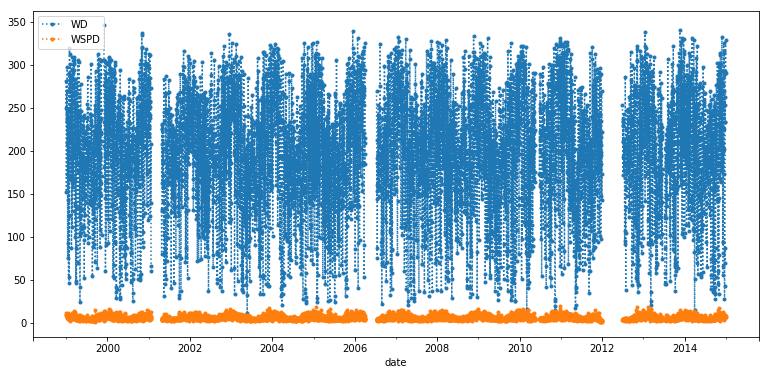

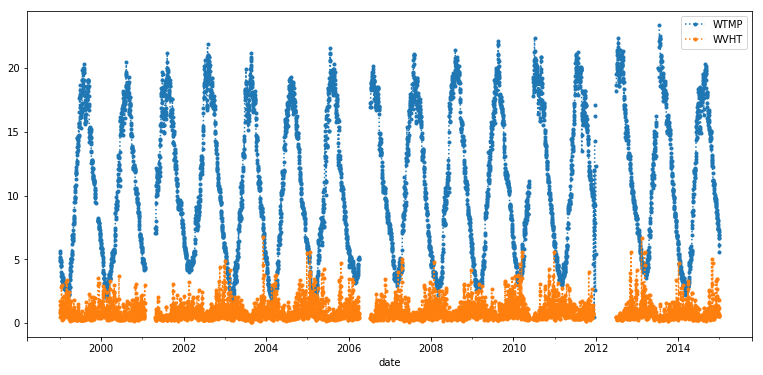

In [304]:
dfWindDaily.plot(y=['APD', 'ATMP'], figsize=(13,6), marker='.', ls=':')
dfWindDaily.plot(y=['DPD', 'EasterlyPersistence'], figsize=(13,6), marker='.', ls=':')
dfWindDaily.plot(y=['GST', 'SoutherlyPersistence'], figsize=(13,6), marker='.', ls=':')
dfWindDaily.plot(y=['WD', 'WSPD'], figsize=(13,6), marker='.', ls=':')
dfWindDaily.plot(y=['WTMP', 'WVHT'], figsize=(13,6), marker='.', ls=':')

# Merge Datasets

In [305]:
# Trim magnetometer data
begin_date = dfStrandingCompact.index[0].to_pydatetime().strftime('%Y-%m-%d')
end_date   = dfStrandingCompact.index[-1].to_pydatetime().strftime('%Y-%m-%d')
dfMag = dfMag.loc[begin_date: end_date]
display(dfMag.head())
display(dfMag.tail())

,FRDH,FRDV,OTTH,OTTV,dH,dV
DATE_TIME,,,,,,
1999-03-07,-15.740840,1.664723,-15.337325,0.562200,-0.403516,1.102523
1999-03-08,1.522195,-2.273765,3.443860,1.060399,-1.921665,-3.334164
1999-03-09,-4.228270,-2.525344,-3.611313,-2.196928,-0.616957,-0.328416
1999-03-10,-10.688324,-8.692065,-18.498465,-24.072058,7.810140,15.379993
1999-03-11,4.257733,-7.564427,4.791968,-5.562022,-0.534235,-2.002405


,FRDH,FRDV,OTTH,OTTV,dH,dV
DATE_TIME,,,,,,
2014-09-10,5.327354,-6.604516,4.789093,-5.388806,0.538261,-1.215710
2014-09-11,-2.366340,-3.869692,-0.762854,-2.689642,-1.603485,-1.180050
2014-09-12,-4.547953,-1.065499,1.995608,7.243949,-6.543562,-8.309448
2014-09-13,-17.535985,3.000010,-14.092082,7.553918,-3.443904,-4.553908
2014-09-14,-11.448505,2.616339,-8.201637,1.210034,-3.246868,1.406305


In [306]:
# Merge magnetometer data with stranding data
dfMerged = dfStrandingCompact.merge(dfMag, how='outer', left_index=True, right_index=True)
dfMerged.head()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,OTTH,OTTV,dH,dV
REPORT_DATE,,,,,,,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0,-15.740840,1.664723,-15.337325,0.562200,-0.403516,1.102523
1999-03-08,0.0,0.0,0,0,0,0,0,0,1.522195,-2.273765,3.443860,1.060399,-1.921665,-3.334164
1999-03-09,0.0,0.0,0,0,0,0,0,0,-4.228270,-2.525344,-3.611313,-2.196928,-0.616957,-0.328416
1999-03-10,0.0,0.0,0,0,0,0,0,0,-10.688324,-8.692065,-18.498465,-24.072058,7.810140,15.379993
1999-03-11,0.0,0.0,0,0,0,0,0,0,4.257733,-7.564427,4.791968,-5.562022,-0.534235,-2.002405


In [307]:
# Trim space weather data
dfSW = dfSW.loc[begin_date: end_date]
display(dfSW.head())
display(dfSW.tail())

,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV
datetime,,,,,,
1999-03-07,35.125,65.0,-43.291667,447.416667,0.547619,0.434286
1999-03-08,24.625,62.0,-26.375000,257.083333,0.535833,0.427500
1999-03-09,34.500,95.0,-35.833333,461.125000,0.551250,0.440000
1999-03-10,38.750,92.0,-44.458333,356.458333,0.536250,0.429167
1999-03-11,29.125,114.0,-23.833333,237.625000,0.540000,0.430000


,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV
datetime,,,,,,
2014-09-10,15.000,169.0,14.541667,99.541667,0.212500,0.091250
2014-09-11,22.875,160.0,1.541667,201.375000,5.104583,1.252917
2014-09-12,40.375,126.0,-1.208333,436.833333,2.525417,0.306667
2014-09-13,24.125,125.0,-26.708333,67.583333,0.127500,0.040417
2014-09-14,3.750,104.0,-16.166667,29.375000,0.090000,0.050000


In [308]:
# Merge Space Weather data
dfMerged = dfMerged.merge(dfSW, how='outer', left_index=True, right_index=True)
dfMerged.head()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,OTTH,OTTV,dH,dV,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV
REPORT_DATE,,,,,,,,,,,,,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0,-15.740840,1.664723,-15.337325,0.562200,-0.403516,1.102523,35.125,65.0,-43.291667,447.416667,0.547619,0.434286
1999-03-08,0.0,0.0,0,0,0,0,0,0,1.522195,-2.273765,3.443860,1.060399,-1.921665,-3.334164,24.625,62.0,-26.375000,257.083333,0.535833,0.427500
1999-03-09,0.0,0.0,0,0,0,0,0,0,-4.228270,-2.525344,-3.611313,-2.196928,-0.616957,-0.328416,34.500,95.0,-35.833333,461.125000,0.551250,0.440000
1999-03-10,0.0,0.0,0,0,0,0,0,0,-10.688324,-8.692065,-18.498465,-24.072058,7.810140,15.379993,38.750,92.0,-44.458333,356.458333,0.536250,0.429167
1999-03-11,0.0,0.0,0,0,0,0,0,0,4.257733,-7.564427,4.791968,-5.562022,-0.534235,-2.002405,29.125,114.0,-23.833333,237.625000,0.540000,0.430000


In [309]:
# Trim tide data
dfTideDaily = dfTideDaily.loc[begin_date: end_date]
display(dfTideDaily.head())
display(dfTideDaily.tail())

,High Tide Ave,Low Tide Ave,High Tide Max,High Tide Min,Low Tide Max,Low Tide Min
Date-Time,,,,,,
1999-03-07,2.780,0.220,2.86,2.70,0.29,0.15
1999-03-08,2.685,0.320,2.79,2.58,0.40,0.24
1999-03-09,2.605,0.405,2.73,2.48,0.49,0.32
1999-03-10,2.545,0.455,2.68,2.41,0.54,0.37
1999-03-11,2.535,0.380,2.67,2.40,0.38,0.38


,High Tide Ave,Low Tide Ave,High Tide Max,High Tide Min,Low Tide Max,Low Tide Min
Date-Time,,,,,,
2014-09-10,3.505,-0.470,3.53,3.48,-0.46,-0.48
2014-09-11,3.480,-0.430,3.48,3.48,-0.41,-0.45
2014-09-12,3.395,-0.325,3.43,3.36,-0.30,-0.35
2014-09-13,3.265,-0.175,3.32,3.21,-0.14,-0.21
2014-09-14,3.115,-0.010,3.19,3.04,0.03,-0.05


In [310]:
# Merge tidal data
dfMerged = dfMerged.merge(dfTideDaily, how='outer', left_index=True, right_index=True)
dfMerged.head()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,OTTH,OTTV,dH,dV,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV,High Tide Ave,Low Tide Ave,High Tide Max,High Tide Min,Low Tide Max,Low Tide Min
REPORT_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0,-15.740840,1.664723,-15.337325,0.562200,-0.403516,1.102523,35.125,65.0,-43.291667,447.416667,0.547619,0.434286,2.780,0.220,2.86,2.70,0.29,0.15
1999-03-08,0.0,0.0,0,0,0,0,0,0,1.522195,-2.273765,3.443860,1.060399,-1.921665,-3.334164,24.625,62.0,-26.375000,257.083333,0.535833,0.427500,2.685,0.320,2.79,2.58,0.40,0.24
1999-03-09,0.0,0.0,0,0,0,0,0,0,-4.228270,-2.525344,-3.611313,-2.196928,-0.616957,-0.328416,34.500,95.0,-35.833333,461.125000,0.551250,0.440000,2.605,0.405,2.73,2.48,0.49,0.32
1999-03-10,0.0,0.0,0,0,0,0,0,0,-10.688324,-8.692065,-18.498465,-24.072058,7.810140,15.379993,38.750,92.0,-44.458333,356.458333,0.536250,0.429167,2.545,0.455,2.68,2.41,0.54,0.37
1999-03-11,0.0,0.0,0,0,0,0,0,0,4.257733,-7.564427,4.791968,-5.562022,-0.534235,-2.002405,29.125,114.0,-23.833333,237.625000,0.540000,0.430000,2.535,0.380,2.67,2.40,0.38,0.38


In [311]:
# Trim wind data
dfWindDaily = dfWindDaily.loc[begin_date: end_date]
dfWindDaily.head()

,APD,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
date,,,,,,,,,,,
1999-03-07,6.396250,-1.104167,1011.250000,8.690000,-1.597614,16.291667,11.183859,207.541667,13.054167,2.666667,3.387917
1999-03-08,5.680000,-5.695833,1023.441667,9.164583,-10.374381,16.000000,7.568804,305.875000,12.883333,2.416667,2.469167
1999-03-09,5.028696,-2.917391,1019.917391,7.371304,-8.124423,11.986957,5.416860,302.347826,9.930435,2.400000,1.556087
1999-03-10,5.221667,-1.233333,1010.266667,9.026250,-4.053519,6.687500,2.885376,293.833333,5.408333,2.400000,1.031667
1999-03-11,4.812917,0.379167,1002.666667,9.791250,-7.269797,10.325000,4.485525,301.500000,8.570833,2.358333,1.192500


In [312]:
# Merge wind data
dfMerged = dfMerged.merge(dfWindDaily, how='outer', left_index=True, right_index=True)

# Save merged database

In [313]:
# Save merged database
dfMerged.to_pickle('Merged_Database.pkl')

# View merged database

In [314]:
pd.set_option('display.max_columns', 500)
dfMerged.head()

,CONDITION_CODE,NUM_ANIMALS,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus,FRDH,FRDV,OTTH,OTTV,dH,dV,Kp_index,Sunspot_No,Dst_index,AE_index,Proton_flux_gt30MeV,Proton_flux_gt60MeV,High Tide Ave,Low Tide Ave,High Tide Max,High Tide Min,Low Tide Max,Low Tide Min,APD,ATMP,BAR,DPD,EasterlyPersistence,GST,SoutherlyPersistence,WD,WSPD,WTMP,WVHT
REPORT_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-03-07,4.0,4.0,0,0,0,4,0,0,-15.740840,1.664723,-15.337325,0.562200,-0.403516,1.102523,35.125,65.0,-43.291667,447.416667,0.547619,0.434286,2.780,0.220,2.86,2.70,0.29,0.15,6.396250,-1.104167,1011.250000,8.690000,-1.597614,16.291667,11.183859,207.541667,13.054167,2.666667,3.387917
1999-03-08,0.0,0.0,0,0,0,0,0,0,1.522195,-2.273765,3.443860,1.060399,-1.921665,-3.334164,24.625,62.0,-26.375000,257.083333,0.535833,0.427500,2.685,0.320,2.79,2.58,0.40,0.24,5.680000,-5.695833,1023.441667,9.164583,-10.374381,16.000000,7.568804,305.875000,12.883333,2.416667,2.469167
1999-03-09,0.0,0.0,0,0,0,0,0,0,-4.228270,-2.525344,-3.611313,-2.196928,-0.616957,-0.328416,34.500,95.0,-35.833333,461.125000,0.551250,0.440000,2.605,0.405,2.73,2.48,0.49,0.32,5.028696,-2.917391,1019.917391,7.371304,-8.124423,11.986957,5.416860,302.347826,9.930435,2.400000,1.556087
1999-03-10,0.0,0.0,0,0,0,0,0,0,-10.688324,-8.692065,-18.498465,-24.072058,7.810140,15.379993,38.750,92.0,-44.458333,356.458333,0.536250,0.429167,2.545,0.455,2.68,2.41,0.54,0.37,5.221667,-1.233333,1010.266667,9.026250,-4.053519,6.687500,2.885376,293.833333,5.408333,2.400000,1.031667
1999-03-11,0.0,0.0,0,0,0,0,0,0,4.257733,-7.564427,4.791968,-5.562022,-0.534235,-2.002405,29.125,114.0,-23.833333,237.625000,0.540000,0.430000,2.535,0.380,2.67,2.40,0.38,0.38,4.812917,0.379167,1002.666667,9.791250,-7.269797,10.325000,4.485525,301.500000,8.570833,2.358333,1.192500
